<a href="https://colab.research.google.com/github/WoojinJeonkr/Python-Data/blob/main/konlpy_colab_news_okt_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [2]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Text(0.5, 1.0, '안녕!')

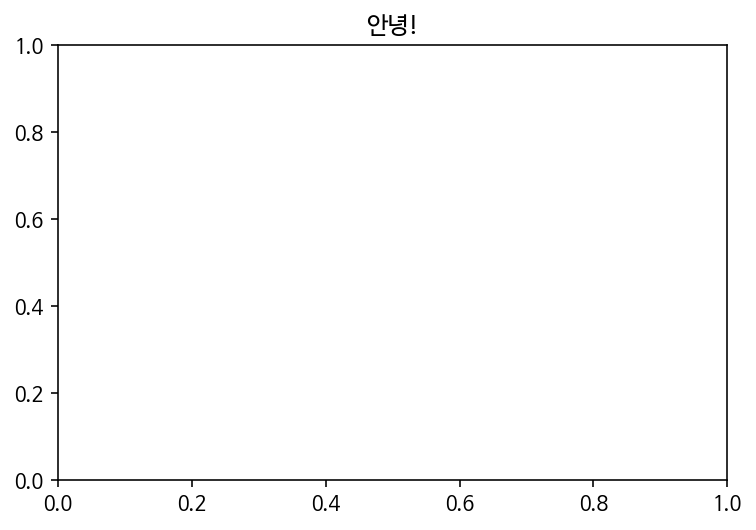

In [3]:
plt.title('안녕!')

In [4]:
!pip install konlpy wordcloud

     |████████████████████████████████| 19.4 MB 58.8 MB/s 
     |████████████████████████████████| 448 kB 45.0 MB/s 


In [5]:
import nltk
from konlpy.corpus import kobill

In [6]:
musk = """2월 테슬라 결제 비트코인으로 →5월 환경에 악영향 끼쳐서 결제 중단
━
= 엘론 머스크 스페이스X 최고경영자(CEO).  (C) AFP=뉴스1

= 엘론 머스크 스페이스X 최고경영자(CEO). (C) AFP=뉴스1

일론 머스크 테슬라 최고경영자(CEO)가 또다시 트위터로 가상자산(암호화폐) 시장을 뒤흔들었다. 이번엔 '불장'(상승랠리)가 아니라 '찬물'이다.
13일 오전 7시30분(한국시간) 머스크는 자신의 트위터를 통해 "비트코인의 테슬라 결제를 중단한다"고 선언했다.

테슬라가 미국 증권거래위원회(SEC)에 "15억 달러 규모(1조7000억)비트코인을 구매했고 향후 테슬라 자동차 판매를 위한 결제수단으로 비트코인을 사용할 수 있도록 할 계획"이라고 밝힌지 불과 3개월만이다.

머스크가 밝힌 비트코인 결제 중단 이유는 환경 이슈다. 비트코인이 전기를 너무 많이 먹어 환경에 악영향을 미친다는 이유다.

그는 비트코인 채굴에 드는 전기로 화석연료, 특히 석탄의 사용이 급격하게 증가하고 있다며 또 암호화폐의 많은 부분에서 좋은 아이디어지만 환경에 악영향을 미친다고 주장했다.

이에 따라 테슬라는 비트코인 채굴에 지속가능한 에너지가 사용될 때가지 전기차 결제를 중단한다고 선언했다.

특히 머스크는 "우리는 비트코인 사용되는 에너지의 1% 이하를 사용하는 다른 암호화폐를 찾고 있다"며 비트코인이 아닌 다른 암호화폐로 옮길 가능성을 내비쳤다.

━
테슬라, 구매한 비트코인 매각해 1억달러 차익...머스크 "개인보유는 안팔았다" 해명에도 비판 쏟아져
━

(서울=뉴스1) 허경 기자 = 테슬라의 배터리 기술·투자 설명회인 '배터리 데이'가 하루 앞으로 다가오면서 국내 배터리 업체들도 혁신적인 기술이 대거 공개될지 숨죽이며 주목하고 있다. 한국 업체들의 강력한 경쟁자가 될 수 있다는 관측이 나오는 가운데, 장기적으로는 기회가 될 것이란 의견도 나온다.  22일 업계에 따르면 테슬라는 오는 23일 오전 5시30분(현지시간 22일 오후 1시30분) 주주총회를 개최한 직후 '배터리 데이'를 열 예정이다.사진은 이날 서울 청담동의 테슬라 매장. 2020.9.22/뉴스1

(서울=뉴스1) 허경 기자 = 테슬라의 배터리 기술·투자 설명회인 '배터리 데이'가 하루 앞으로 다가오면서 국내 배터리 업체들도 혁신적인 기술이 대거 공개될지 숨죽이며 주목하고 있다. 한국 업체들의 강력한 경쟁자가 될 수 있다는 관측이 나오는 가운데, 장기적으로는 기회가 될 것이란 의견도 나온다. 22일 업계에 따르면 테슬라는 오는 23일 오전 5시30분(현지시간 22일 오후 1시30분) 주주총회를 개최한 직후 '배터리 데이'를 열 예정이다.사진은 이날 서울 청담동의 테슬라 매장. 2020.9.22/뉴스1
머스크와 테슬라의 '뒤통수'는 이번이 처음이 아니다.
테슬라가 보유 중이던 비트코인을 몇개월만에 매각한 것으로 뒤늦게 확인되면서 이에 대한 비판이 일었다.

지난달 26일 테슬라는 실적발표와 함께 "매입했던 15억 달러 어치 비트코인 중 10%를 2억2700만달러에 매각해 1억1000만달러(1220억원) 이익을 얻었다"고 밝혔다.

당시 잭 커크혼 테슬라 최고재무책임자(CFO)"당장 이익을 위해 비트코인을 매수하지는 않았지만 필요가 있어 일부를 매각했다"고 부연했다.

앞선 2월 테슬라가 15억달러(약 1조7000억원)규모의 비트코인을 매입했다고 발표하던 당시 테슬라 측은 "향후 자산의 일부를 디지털 자산에 더 투자할 수 있다"며 "비트코인을 장기 무형자산으로 회계처리 하고 분기별로 가상화폐 보유 현황을 분석할 것"이라고 까지 밝혔다.
특히 머스크는 그동안 비트코인을 직접 홍보하고 본인을 '비트코인의 지지자'라며 주변에 비트코인 매수를 독려해왔다. 올해 초부터는 자신의 트위터 자기소개란에 비트코인이라는 단어를 넣기까지 했다.

올해 초부터 비트코인이 상승랠리는 이어가는 데는 머스크와 테슬라의 '비트코인 공개 홍보' 덕분이라는 분석이 나올 정도였다.

하지만 테슬라가 비트코인 매입을 발표하며 투자 독려를 하던 1분기 동안 비트코인 일부를 매각했다는 사실이 알려지며 머스크는 비판의 중심이 됐다. 머스크는 즉각 반박 트윗을 올려 "내가 개인적으로 보유한 비트코인은 팔지 않았다"며 "테슬라가 비트코인 일부를 매각한 것은 비트코인이 현금으로서 자산 유동성의 가치를 보유하고 있다는 점을 증명하기 위한 것"이라고 전했다.

━
머스크, 도지코인 '희망고문'…SNL에선 "내가 도지 파더(아버지)" vs 방송 끝나곤 "도지코인은 사기"
━


머스크가 최근 가장 많이 언급하는 암호화폐는 비트코인보다 도지코인이다.
도지코인은 온라인에서 인기를 끈 시바견 밈(meme) '도지'를 본 따 만들어진 암호화폐로 지난 2013년 12월 빌리마커스와 잭슨 팔머에 의해 만들어졌다.

도지코인이 유명해진 것은 일론 머스크 테슬라 최고경영자(CEO)가 도지코인을 가장 좋아하는 암호화폐 중 하나로 언급하면서다. 머스크 CEO는 도지코인을 "우리 모두의 암호화폐"라고 지칭하며 응원했다. 떄로 "작은 X(아들)를 위해 도지코인을 샀다" "도지코인을 달 위에 놓을 것" 등의 홍보성 발언을 종종 했다.

특히 지난달 미국 최대 암호화폐 거래사이트 '코인베이스'의 나스닥 상장을 앞두고 도지코인이 폭등했다. 코인베이스는 도지코인을 한 차례 거부한 바 있었다. 당시 트위터 이용자가 머스크에게 "도지코인에게 더 쉽게 접근(투자)할 수 있도록 코인베이스가 도지코인을 상장시켜야 한다고 보는가"라는 질문을 트윗으로 남겼는데 머스크가 "그렇다"고 답변을 남긴 것.

이후 70~80원대 거래되던 도지코인 가격이 급등하기 시작했다.

머스크는 며칠 뒤 또 트위터에 스페인 화가 호안 미로의 '달을 향해 짖는 개'(Dog Barking at the Moon) 사진을 게시하며 "Doge Barking at the Moon."(달은 향해 짖는 도지(개))라는 트위터를 남겼다.

꾸준히 오른 도지코인은 500원대까지 돌파했다. 지난달 27일(현지 시각) 밤 머스크가 다시금 자신의 트윗에 "도지파더(Dodgefather) SNL 5월8일"이라는 짧은 글을 남기면서 잠잠하던 도지코인은 다시 출렁이기 시작했다. 미국 NBC방송 코미디쇼 '새터데이 나이트 라이브'(SNL) 출연을 예고하는 글이었다.

하지만 정작 머스크 출연 이후 도지코인은 9일(현지시간) 한때 35% 이상 급락했다. 머스크는 SNL의 한 코너에서 자신을 '도지코인의 아버지'라 소개하며 도지코인이 "미래의 화폐", "세계를 장악할 금융수단"이라 했다.

이런 설명에도 진행자가 "그래서 사기(hustle) 아니냐"고 재차 묻자 머스크는 마지못해 대답한다는 표정으로 "맞다. 사기"라고 했다. '농담'으로 나온 발언이나 이 방송 전 73센트를 넘어서며 사상 최고가를 돌파한 도지코인 가격은 방송 후 47센트대까지 급락했다."""

In [7]:
from konlpy.tag import Okt

In [8]:
t = Okt()

In [9]:
tokens_musk = t.nouns(musk)
tokens_musk

['테슬라',
 '결제',
 '비트코인',
 '환경',
 '악',
 '영향',
 '결제',
 '중단',
 '엘론',
 '머스크',
 '스페이스',
 '최고경영자',
 '뉴스',
 '엘론',
 '머스크',
 '스페이스',
 '최고경영자',
 '뉴스',
 '론',
 '머스크',
 '테슬라',
 '최고경영자',
 '트위터',
 '가상',
 '자산',
 '암호',
 '화폐',
 '시장',
 '뒤',
 '이번',
 '불',
 '상승',
 '랠리',
 '찬물',
 '오전',
 '한국',
 '시간',
 '머스크',
 '자신',
 '트위터',
 '통해',
 '비트코인',
 '테슬라',
 '결제',
 '중단',
 '고',
 '선언',
 '테슬라',
 '미국',
 '증권',
 '거래',
 '위원회',
 '달러',
 '규모',
 '비트코인',
 '구매',
 '향후',
 '테슬라',
 '자동차',
 '판매',
 '위',
 '결제',
 '수단',
 '비트코인',
 '사용',
 '수',
 '계획',
 '불과',
 '개월',
 '머스크',
 '비트코인',
 '결제',
 '중단',
 '이유',
 '환경',
 '이슈',
 '비트코인',
 '전기',
 '환경',
 '악',
 '영향',
 '이유',
 '그',
 '비트코인',
 '채굴',
 '전기',
 '화석연료',
 '석탄',
 '사용',
 '증가',
 '또',
 '암호',
 '화폐',
 '부분',
 '아이디어',
 '환경',
 '악',
 '영향',
 '주장',
 '이',
 '테슬라',
 '비트코인',
 '채굴',
 '지속',
 '에너지',
 '사용',
 '때',
 '가지',
 '전기차',
 '결제',
 '중단',
 '선언',
 '머스크',
 '우리',
 '비트코인',
 '사용',
 '에너지',
 '이하',
 '사용',
 '다른',
 '암호',
 '화폐',
 '며',
 '비트코인',
 '다른',
 '암호',
 '화폐',
 '가능성',
 '내비',
 '테슬라',
 '구매',
 '비트코인',
 '매각',
 '차익',
 '머스크',
 '개인',
 

In [10]:
ko_musk = nltk.Text(tokens_musk, name="test")

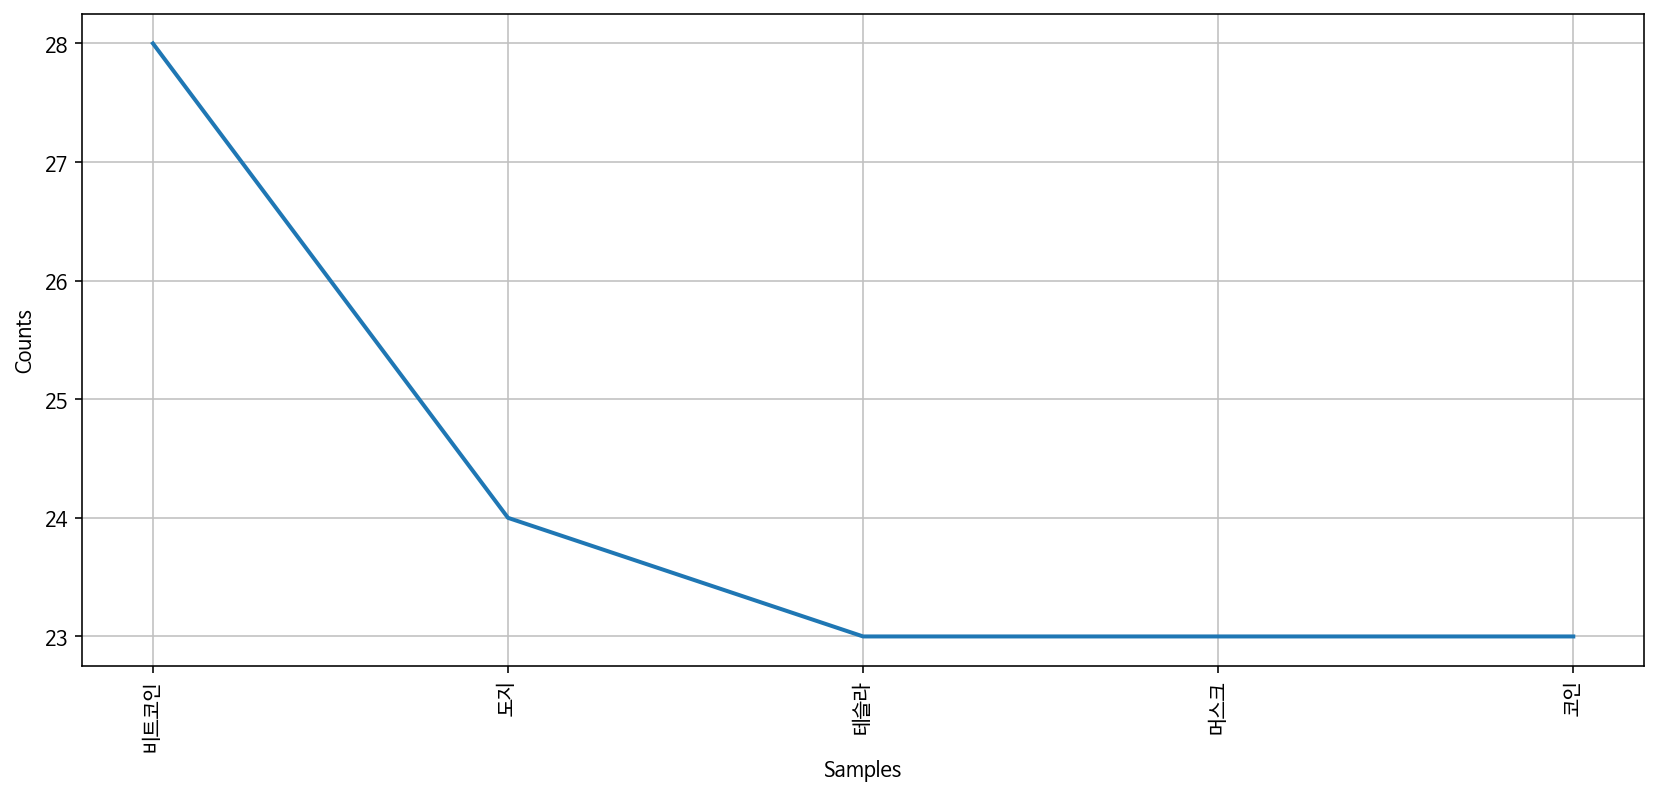

In [11]:
plt.figure(figsize=(14,6))
ko_musk.plot(5)
plt.show()

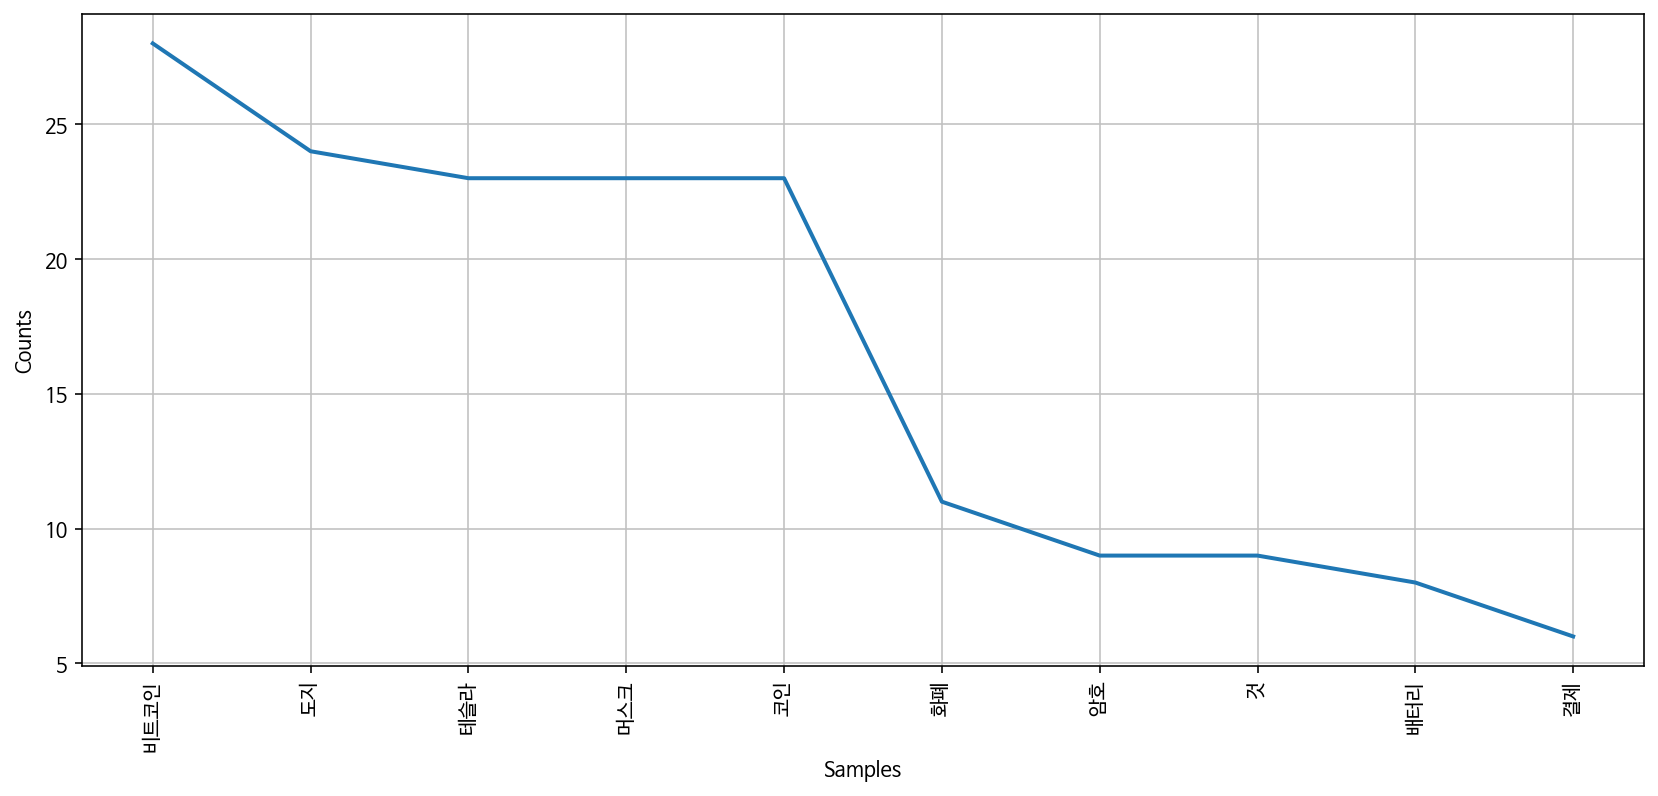

In [12]:
plt.figure(figsize=(14,6))
ko_musk.plot(10)
plt.show()

In [15]:
data = ko_musk.vocab().most_common(200)
data

[('비트코인', 28),
 ('도지', 24),
 ('테슬라', 23),
 ('머스크', 23),
 ('코인', 23),
 ('화폐', 11),
 ('암호', 9),
 ('것', 9),
 ('배터리', 8),
 ('결제', 6),
 ('뉴스', 6),
 ('트위터', 6),
 ('매각', 6),
 ('자산', 5),
 ('고', 5),
 ('사용', 5),
 ('수', 5),
 ('보유', 5),
 ('투자', 5),
 ('를', 5),
 ('환경', 4),
 ('중단', 4),
 ('최고경영자', 4),
 ('시간', 4),
 ('자신', 4),
 ('서울', 4),
 ('기술', 4),
 ('데이', 4),
 ('업체', 4),
 ('현지', 4),
 ('일부', 4),
 ('방송', 4),
 ('악', 3),
 ('영향', 3),
 ('오전', 3),
 ('한국', 3),
 ('미국', 3),
 ('거래', 3),
 ('위', 3),
 ('이', 3),
 ('며', 3),
 ('비판', 3),
 ('설명', 3),
 ('공개', 3),
 ('장기', 3),
 ('사진', 3),
 ('중', 3),
 ('지난달', 3),
 ('발표', 3),
 ('매입', 3),
 ('당시', 3),
 ('홍보', 3),
 ('트윗', 3),
 ('사기', 3),
 ('달', 3),
 ('베이스', 3),
 ('엘론', 2),
 ('스페이스', 2),
 ('론', 2),
 ('가상', 2),
 ('뒤', 2),
 ('이번', 2),
 ('상승', 2),
 ('랠리', 2),
 ('선언', 2),
 ('달러', 2),
 ('규모', 2),
 ('구매', 2),
 ('향후', 2),
 ('수단', 2),
 ('이유', 2),
 ('전기', 2),
 ('채굴', 2),
 ('또', 2),
 ('에너지', 2),
 ('우리', 2),
 ('다른', 2),
 ('개인', 2),
 ('경', 2),
 ('기자', 2),
 ('회', 2),
 ('하루', 2),
 ('앞', 2),


In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
wc = WordCloud(font_path=fontpath, relative_scaling=0.2, 
               background_color='white').generate_from_frequencies(dict(data))

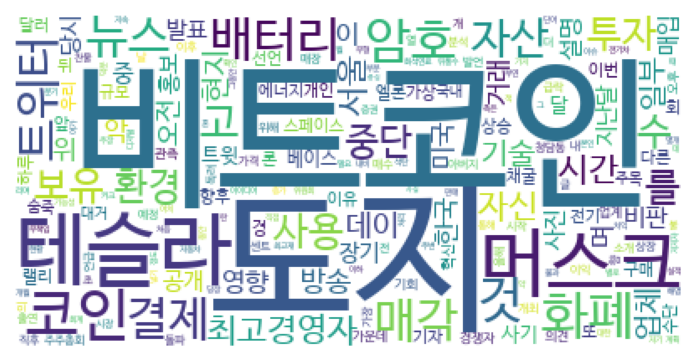

In [18]:
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()